In [1]:
import os
import requests
import pandas as pd
import json
from datetime import datetime, timedelta
import time
from pandas.plotting import scatter_matrix



In [4]:
df1=pd.read_json('../sample-actions-endlessbank1-20190302.json',lines=True)
df2=pd.read_json('../sample-actions-endlessdicex-20190302.json',lines=True)

In [5]:
df2.head()

,account,account_action_seq,authorization,block_num,d_from,d_memo,d_quantity,d_quantity_unit,d_to,dapp_code,global_action_seq,name,trx_id,trx_timestamp,trx_timestamp_unix
0,eosio.token,3369456,"[{'actor': 'endlessdicex', 'permission': 'acti...",45405496,endlessdicex,bet id:13252288 player: eossuperplay send to b...,0.490,EOS,endlessbank1,Endless Dice,5345046328,transfer,c19e50c1c15718ca9ba83f53200e431c36b3a0f06b3805...,2019-03-02T00:00:01.000,1.551485e+09
1,eosio.token,3369458,"[{'actor': 'endlessdicex', 'permission': 'acti...",45405496,endlessdicex,bet id:13252288 player: eossuperplay dividend ...,0.004,EOS,endlessdivdn,Endless Dice,5345046331,transfer,c19e50c1c15718ca9ba83f53200e431c36b3a0f06b3805...,2019-03-02T00:00:01.000,1.551485e+09
2,eosio.token,3369460,"[{'actor': 'endlessdicex', 'permission': 'acti...",45405496,endlessdicex,bet id:13252288 player: eossuperplay send to c...,0.006,EOS,endlessoptex,Endless Dice,5345046334,transfer,c19e50c1c15718ca9ba83f53200e431c36b3a0f06b3805...,2019-03-02T00:00:01.000,1.551485e+09
3,eosio.token,3369461,"[{'actor': 'justiceariel', 'permission': 'acti...",45405496,justiceariel,96-87730b7cf19d7697f7ff6ee04c377be61af038261f4...,0.100,EOS,endlessdicex,Endless Dice,5345046365,transfer,2574881f4d2f738d80e943cbb6f452d57cbc14b398806a...,2019-03-02T00:00:01.000,1.551485e+09
4,eosio.token,3369462,"[{'actor': 'endlessdicex', 'permission': 'acti...",45405503,endlessdicex,bet id:13252291 player: justiceariel send to b...,0.098,EOS,endlessbank1,Endless Dice,5345047947,transfer,d315f585ded252559c2013abdda614259b32d6a550817e...,2019-03-02T00:00:04.500,1.551485e+09


In [43]:
list_bots=['edgarwinston','Griffinhamza','jacksonjimmy','1ffyqhg4rmbk','1ffyqhg4rmbk','powellernest','2rezoaf4bhly','nckj42dit5sb','scottphillip','oepa252sdx4p','myh2o4wayvxg']
list_humans=['g44dinjygene','onebrother11','rvrkingfishr','iloveyoudapp','huiyong12345','pketothemoon','zhshj1212123','vipgamedice2','dldldldldldl','pkeniubixxxx']

In [41]:
training_bots= df2[pd.DataFrame(df2['d_from'].to_list()).isin(list_bots).any(1)]

In [46]:
training_bots_2= df1[pd.DataFrame(df1['d_from'].to_list()).isin(list_bots).any(1)]

In [47]:
training_bots_2

,account,account_action_seq,authorization,block_num,d_from,d_memo,d_quantity,d_quantity_unit,d_to,dapp_code,global_action_seq,name,trx_id,trx_timestamp,trx_timestamp_unix


In [42]:
training_bots.head()

,account,account_action_seq,authorization,block_num,d_from,d_memo,d_quantity,d_quantity_unit,d_to,dapp_code,global_action_seq,name,trx_id,trx_timestamp,trx_timestamp_unix
7,eosio.token,3369467,"[{'actor': 'edgarwinston', 'permission': 'acti...",45405503,edgarwinston,96-52bb2af4bbcf7e033062eea7696c3b6d2ff0f7b604c...,0.1,EOS,endlessdicex,Endless Dice,5345048058,transfer,c215f2c76215702534ad141dc0bfdf9e50952bbe00196b...,2019-03-02T00:00:04.500,1.551485e+09


### Only one bot? How are we going to train a supervised learning algorithm off this data?

In [7]:
df2['d_to'].value_counts()

endlessbank1    250
endlessoptex    250
endlessdicex    250
endlessdivdn    250
Name: d_to, dtype: int64

In [44]:
training_humans=df2[pd.DataFrame(df2['d_from'].to_list()).isin(list_humans).any(1)]

In [45]:
training_humans.head()

,account,account_action_seq,authorization,block_num,d_from,d_memo,d_quantity,d_quantity_unit,d_to,dapp_code,global_action_seq,name,trx_id,trx_timestamp,trx_timestamp_unix


In [15]:
df2_1=df2.drop(['account','account_action_seq','block_num','trx_id','trx_timestamp','trx_timestamp_unix'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19780a58>,
      dtype=object)

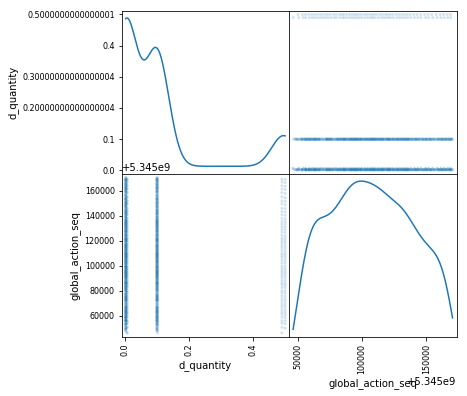

In [16]:
scatter_matrix(df2_1, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [8]:
df2['authorization'].value_counts()

[{'actor': 'endlessdicex', 'permission': 'active'}]    750
[{'actor': 'nmslnmslnmsl', 'permission': 'active'}]     54
[{'actor': 'eossuperplay', 'permission': 'active'}]     53
[{'actor': 'juanroderick', 'permission': 'active'}]      1
[{'actor': 'miguelmalaki', 'permission': 'active'}]      1
[{'actor': 'sinceregrady', 'permission': 'active'}]      1
[{'actor': 'tristinjavon', 'permission': 'active'}]      1
[{'actor': 'fernandoyair', 'permission': 'active'}]      1
[{'actor': 'griffinhamza', 'permission': 'active'}]      1
[{'actor': 'huntersamson', 'permission': 'active'}]      1
[{'actor': 'alfonsoramon', 'permission': 'active'}]      1
[{'actor': 'abrahamnigel', 'permission': 'active'}]      1
[{'actor': 'jaylenfinley', 'permission': 'active'}]      1
[{'actor': 'luisclarence', 'permission': 'active'}]      1
[{'actor': 'gaelsullivan', 'permission': 'active'}]      1
[{'actor': 'ariguillermo', 'permission': 'active'}]      1
[{'actor': 'guillermoari', 'permission': 'active'}]     

# Cleaning Data for Simple Model _Remove timestamp